In [2]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import joblib
import random
import sys
import os

sys.path.append(os.path.abspath('../src'))
from classifiers.mnist_classifier import MnistClassifier

# is used for loading weights 
from classifiers.random_forest import RandomForest
from classifiers.__decision_tree import DecisionTree
from classifiers.__decision_tree import Node


2025-02-27 20:45:27.787490: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
weights_path = '../src/weights'
if not os.path.exists(weights_path):
    os.makedirs(weights_path)

# Loading the MNIST Dataset
This cell loads the MNIST dataset using TensorFlow's Keras API. The MNIST dataset consists of 60,000 28x28 grayscale images 
for training and 10,000 for testing. Each image is labeled with a digit from 0 to 9.

In [5]:
(x_train_main, y_train), (x_test_main, y_test) = mnist.load_data()
print(x_train_main.shape)
print(x_test_main.shape)

(60000, 28, 28)
(10000, 28, 28)


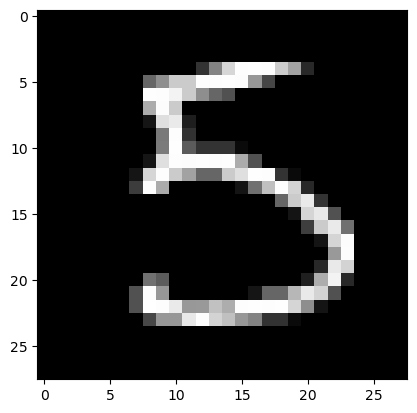

5


In [7]:
plt.imshow(x_test_main[15], cmap='gray')
plt.show()
print(y_test[15])

# Models

## Feed-Forward Neural Network (FFNN)

Dataset normalization

In [8]:
x_train_main_norm = x_train_main / 255.0
x_test_main_norm = x_test_main / 255.0

FFNN initialization

In [9]:
ffnn_model = MnistClassifier('nn')

Training the model on the normalized datase

In [10]:
# ffnn_model.train(x_train_main_norm, y_train, epochs=15, verbose=2)

Saving

In [11]:
# ffnn_model.save(os.path.join(weights_path, 'ffnn_epochs15_default.h5'))

Since training may take a long time, we can load pre-existing weights to skip training

In [12]:
ffnn_model.load(os.path.join(weights_path, 'ffnn_epochs15_default.h5'))

FFNN model loaded from ../src/weights/ffnn_epochs15_default.h5


Checking accuracy

In [13]:
ffnn_y_pred = ffnn_model.predict(x_test_main_norm)
ffnn_model.accuracy(y_test, ffnn_y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


0.9606

Testing

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1

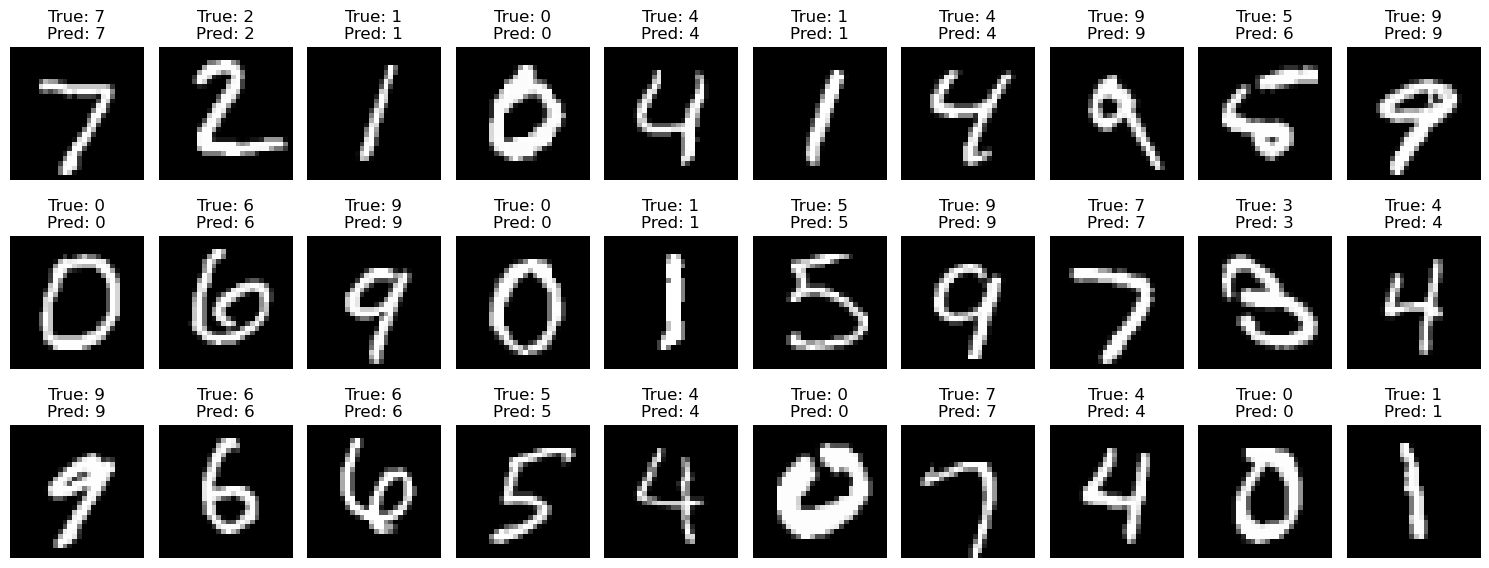

In [15]:
fig = plt.figure(figsize=(15,6))  
for i in range(30):
    ax = fig.add_subplot(3, 10, i+1)  
    ax.imshow(np.squeeze(x_test_main[i]), cmap='gray')  
    ax.set_title(f"True: {y_test[i]}\nPred: {ffnn_model.predict(x_test_main[i:i+1])[0]}", fontsize=12) 
    ax.axis('off')

plt.tight_layout()  
plt.show()


## Convolutional Neural Network (CNN)


(x_train_main and x_test_main) are reshaped to add an additional dimension, converting them into 4D arrays with the shape (samples, height, width, channels), where channels=1 represents the grayscale images. The images are also normalized.

In [16]:
x_train_extended = x_train_main.reshape((60000, 28, 28, 1))/ 255.0
x_test_extended = x_test_main.reshape((10000, 28, 28, 1)) / 255.0


In [17]:
x_train_extended.shape

(60000, 28, 28, 1)

CNN initialization

In [18]:
cnn_model = MnistClassifier(algorithm='cnn')

Training the model on the normalized and reshaped dataset

In [19]:
# cnn_model.train(x_train_extended, y_train, epochs=10, batch_size=128, verbose=2)

Saving

In [20]:
# cnn_model.save(os.path.join(weights_path, 'cnn_epochs10_batch128_default.h5'))

Since training may take a long time, we can load pre-existing weights to skip training

In [21]:
cnn_model.load(os.path.join(weights_path, 'cnn_epochs10_batch128_default.h5'))

CNN model loaded from ../src/weights/cnn_epochs10_batch128_default.h5


Checking accuracy

In [22]:
cnn_y_pred = cnn_model.predict(x_test_extended)
cnn_model.accuracy(y_test, cnn_y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


0.9939

Testing

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━

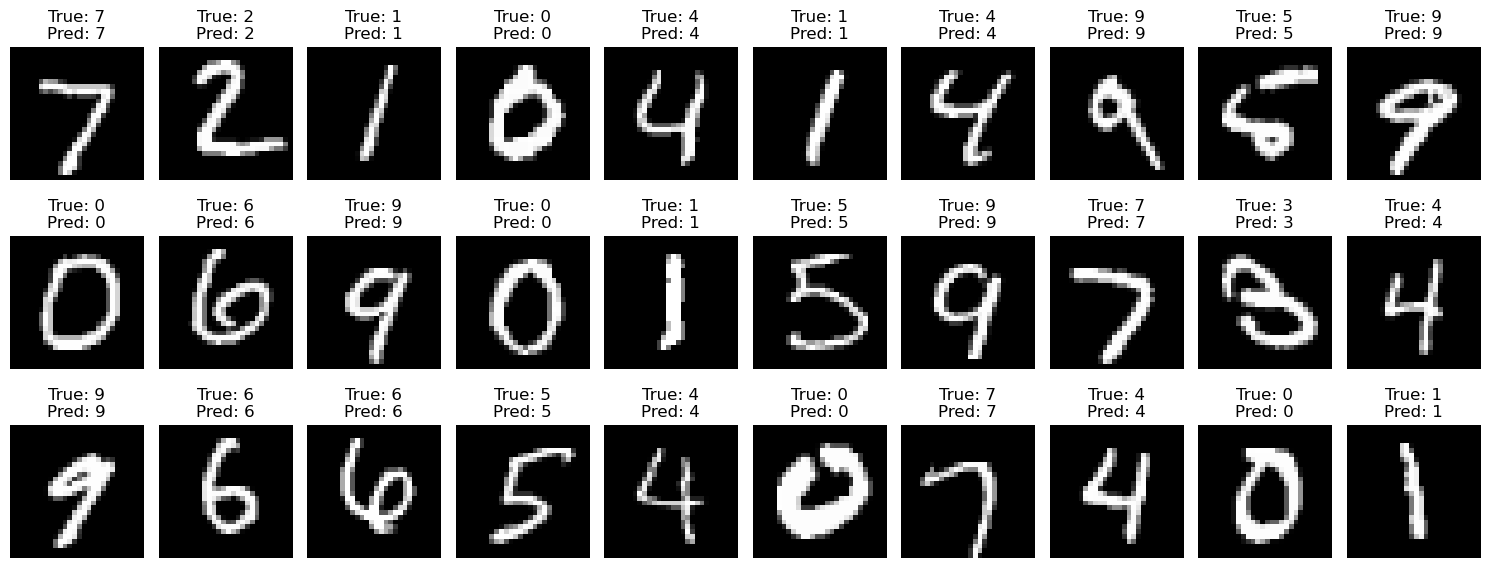

In [23]:
fig = plt.figure(figsize=(15,6))  
for i in range(30):
    ax = fig.add_subplot(3, 10, i+1)  
    ax.imshow(np.squeeze(x_test_main[i]), cmap='gray')  
    ax.set_title(f"True: {y_test[i]}\nPred: {cnn_model.predict(x_test_extended[i:i+1])[0]}", fontsize=12) 
    ax.axis('off')

plt.tight_layout()  
plt.show()


## Random Forest

The training and test datasets are flattened into 2D arrays with shape (samples, features), where each image is represented as a 1D vector of length 28 * 28. This transformation is necessary for Random Forest, as it expects 2D input. The datasets are also reduced in size to speed up training, which may affect the model's performance due to the reduced amount of data for training.

In [24]:
x_train_main = x_train_main[:3000]
x_test_main = x_test_main[:1000]

x_train_flatten = x_train_main.reshape((x_train_main.shape[0], 28 * 28)) / 255.0
x_test_flatten = x_test_main.reshape((x_test_main.shape[0], 28 * 28)) / 255.0

y_train = y_train[:3000]
y_test = y_test[:1000]


In [25]:
x_train_flatten.shape

(3000, 784)

RF initialization

In [26]:
rf_model = MnistClassifier('rf')

Training the model on the normalized and reshaped dataset

In [27]:
# rf_model.train(x_train_flatten, y_train)

Saving

In [28]:
# rf_model.save(os.path.join(weights_path, 'rf_model_default_dataset3000.pkl'))

Since training takes really long time, we load pre-existing weights to skip training

In [29]:
rf_model.load(os.path.join(weights_path, 'rf_model_default_dataset3000.pkl'))

RandomForest model loaded and updated from ../src/weights/rf_model_default_dataset3000.pkl


Checking accuracy

This is realy low because of reduced dataset

In [30]:
rf_y_pred = rf_model.predict(x_test_flatten)
rf_model.accuracy(y_test, rf_y_pred)

0.383

Testing

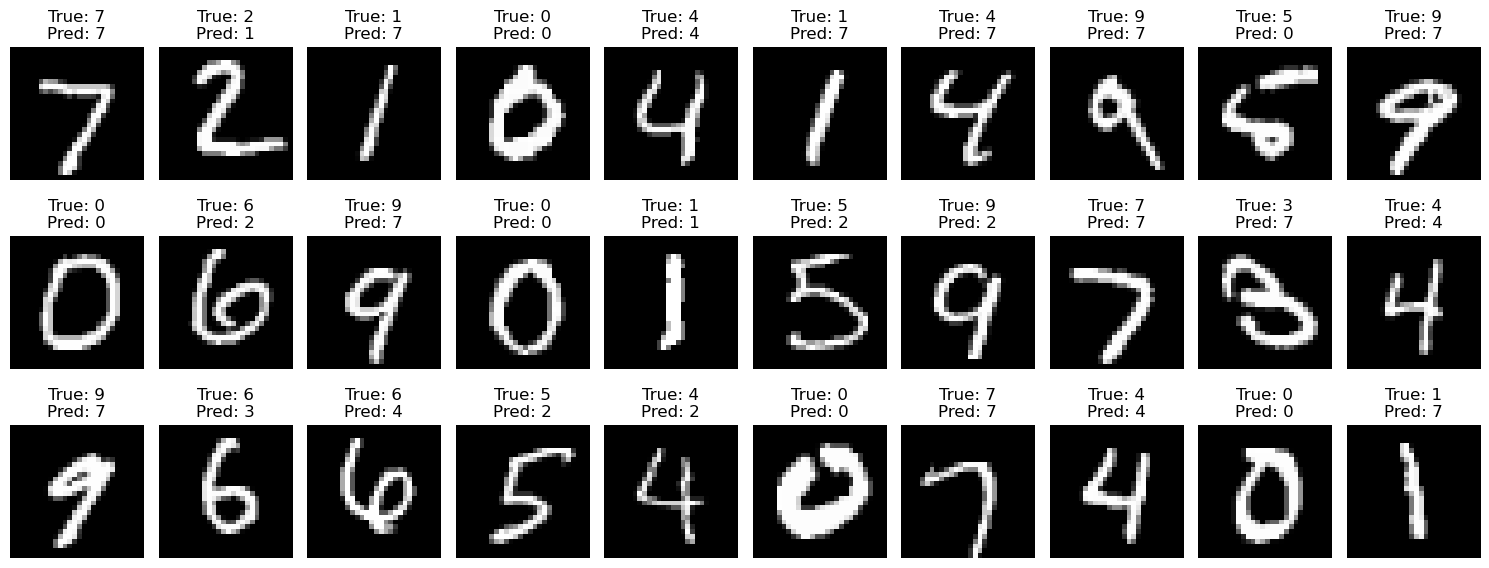

In [32]:
fig = plt.figure(figsize=(15,6))  
for i in range(30):
    ax = fig.add_subplot(3, 10, i+1)  
    ax.imshow(np.squeeze(x_test_main[i]), cmap='gray')  
    ax.set_title(f"True: {y_test[i]}\nPred: {rf_model.predict(x_test_flatten[i:i+1])[0]}", fontsize=12) 
    ax.axis('off')

plt.tight_layout()
plt.show()
